# ARTIFICIAL NEURAL NETWORKS

## IMPORTING LLIBRARIES

In [1]:
!pip install keras

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [3]:
!pip install tensorflow

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
import warnings
from sklearn.model_selection import GridSearchCV
from kerastuner import RandomSearch
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

##  Data Exploration and Preprocessing

In [7]:
alpha=pd.read_csv('Alphabets_data.csv')
alpha

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [8]:
alpha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [9]:
alpha.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [10]:
alpha.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [11]:
alpha.dtypes

,0
letter,object
xbox,int64
ybox,int64
width,int64
height,int64
onpix,int64
xbar,int64
ybar,int64
x2bar,int64
y2bar,int64


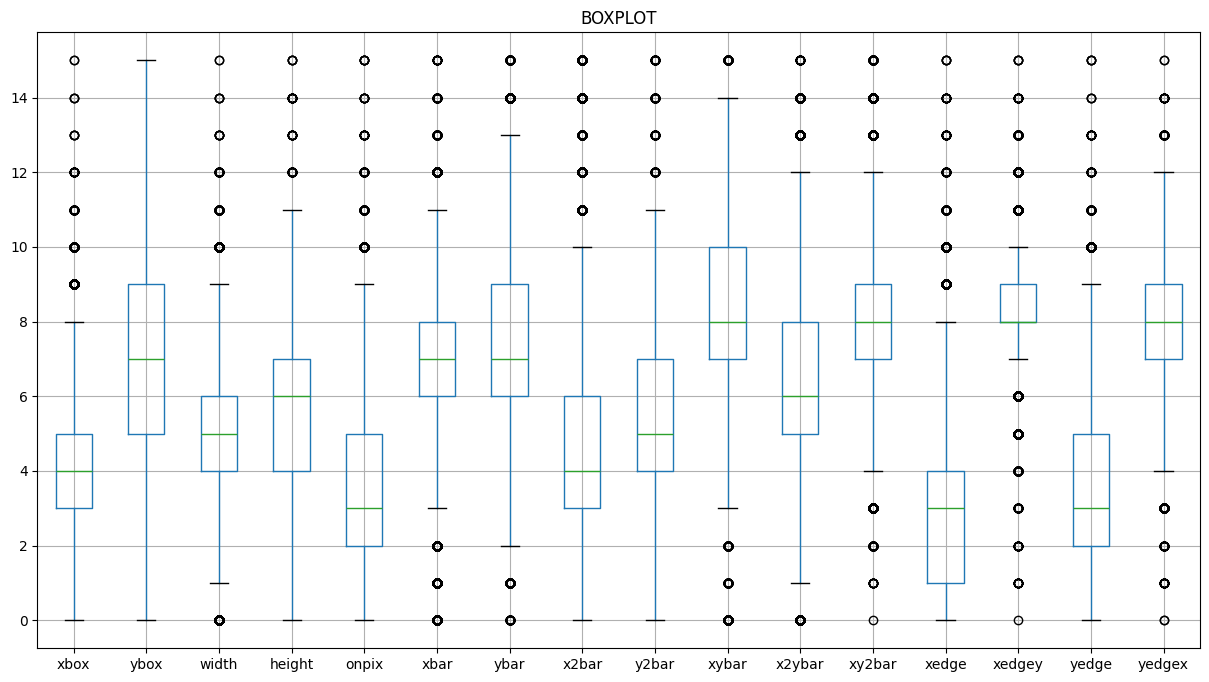

In [12]:
plt.figure(figsize=(15,8))
alpha.boxplot()
plt.title('BOXPLOT')
plt.show()

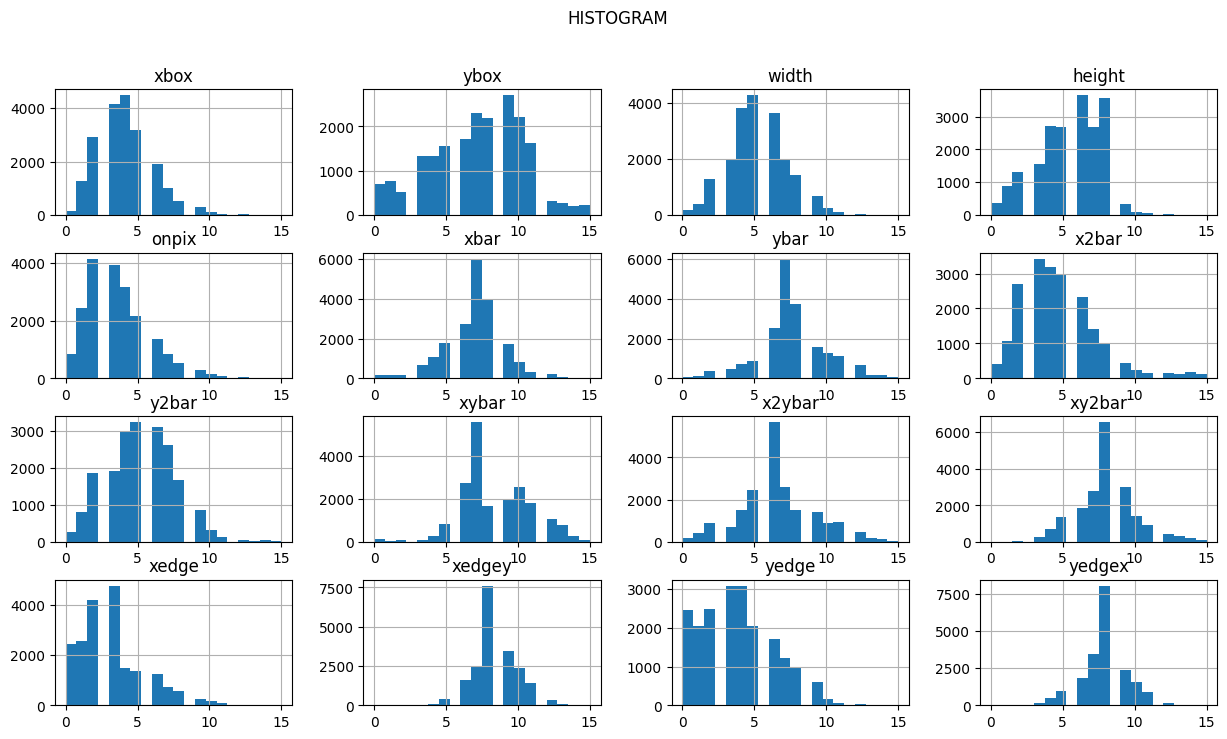

In [13]:
alpha.hist(bins=20,figsize=(15,8))
plt.suptitle('HISTOGRAM')
plt.show()

In [14]:
features=alpha.drop(['letter'],axis=1)
target=alpha['letter']

## ENCODING CATEGORICAL VARIABLES

In [15]:
lal=LabelEncoder()
encoded=lal.fit_transform(target)
encoded

array([19,  8,  3, ..., 19, 18,  0])

## STANDARDIZING THE FEATURES DATA

In [16]:
stn=StandardScaler()
scaled_features=stn.fit_transform(features)
scaled_features

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

## 	Divide the dataset into training and test sets.

In [17]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,encoded,test_size=0.3,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14000, 16)
(14000,)
(6000, 16)
(6000,)


## Model Implementation

In [18]:
warnings.simplefilter('ignore')
model=Sequential([
    Dense(128, input_dim=x_train.shape[1], activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(26, activation='softmax')
])

In [19]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# One-hot encode target labels
y_train = to_categorical(y_train, num_classes=26)  # Adjust num_classes as needed
y_test = to_categorical(y_test, num_classes=26)

In [21]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (14000, 16)
y_train shape: (14000, 26)


In [22]:
model.fit(x_train,y_train, epochs=20, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5673 - loss: 1.4337 - val_accuracy: 0.8370 - val_loss: 0.5182
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8368 - loss: 0.5127 - val_accuracy: 0.8333 - val_loss: 0.5425
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.4174 - val_accuracy: 0.8660 - val_loss: 0.4804
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8831 - loss: 0.3816 - val_accuracy: 0.8852 - val_loss: 0.3674
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8836 - loss: 0.3571 - val_accuracy: 0.8903 - val_loss: 0.3406
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9083 - loss: 0.3067 - val_accuracy: 0.8732 - val_loss: 0.4357
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9135 - loss: 0.2858 - val_accuracy: 0.8932 - val_loss: 0.3617
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9113 - loss: 0.2763 - val_accuracy: 0.

## Hyperparameter Tuning

In [23]:
global num_classes
num_classes = len(lal.classes_)

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16),
                    activation='relu',
                    input_shape=(x_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16),
                    activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Use num_classes here
    model.compile(optimizer=tf.keras.optimizers.Adam(
                      learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [24]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='alphabet_tuning'
)

tuner.search(x_train, encoded, epochs=20, validation_split=0.2)

Trial 5 Complete [00h 01m 23s]
val_accuracy: 0.04142857094605764

Best val_accuracy So Far: 0.04321428512533506
Total elapsed time: 00h 06m 54s


In [47]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

Best units1: 48, Best units2: 32, Best learning_rate: 0.001


##  Evaluation

In [46]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9228 - loss: 0.3006
Test Accuracy: 0.9243333339691162
